In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from plotnine import ggplot, aes, geom_col, labs, theme
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from plotnine import ggplot, aes, geom_col, labs, theme, scale_x_discrete, scale_y_continuous
from plotnine.themes.elements import element_text



# **Importing Csv File :**

In [79]:
cd = pd.read_csv('covid_data.csv')
cd.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious,Total_Cases.1,Deaths,Total_Tests
0,USA,502876,33752.0,18747.0,2035.0,27314.0,456815,10917.0,1519.0,57.0,2538888.0
1,Spain,158273,5051.0,16081.0,634.0,55668.0,86524,7371.0,3385.0,344.0,355000.0
2,Italy,147577,3951.0,18849.0,570.0,30455.0,98273,3497.0,2441.0,312.0,906864.0
3,France,124869,7120.0,13197.0,987.0,24932.0,86740,7004.0,1913.0,202.0,333807.0
4,Germany,122171,3936.0,2736.0,129.0,53913.0,65522,4895.0,1458.0,33.0,1317887.0


# **Subset for relevant columns**

In [80]:
cd1 = cd[['Country', 'Total_Cases','Active_Cases', 'Total_Deaths', 'Total_Recovered','Total_Cases.1','Deaths']]


In [81]:
cd1.head()

,Country,Total_Cases,Active_Cases,Total_Deaths,Total_Recovered,Total_Cases.1,Deaths
0,USA,502876,456815,18747.0,27314.0,1519.0,57.0
1,Spain,158273,86524,16081.0,55668.0,3385.0,344.0
2,Italy,147577,98273,18849.0,30455.0,2441.0,312.0
3,France,124869,86740,13197.0,24932.0,1913.0,202.0
4,Germany,122171,65522,2736.0,53913.0,1458.0,33.0


In [82]:
cd1.shape

(212, 7)

In [83]:
cd1.dtypes

,0
Country,object
Total_Cases,int64
Active_Cases,int64
Total_Deaths,float64
Total_Recovered,float64
Total_Cases.1,float64
Deaths,float64


In [84]:
cd1['Normal_cases'] = cd1['Total_Cases'] - cd1['Total_Deaths']


/tmp/ipython-input-3425439317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
cd1.head()

,Country,Total_Cases,Active_Cases,Total_Deaths,Total_Recovered,Total_Cases.1,Deaths,Normal_cases
0,USA,502876,456815,18747.0,27314.0,1519.0,57.0,484129.0
1,Spain,158273,86524,16081.0,55668.0,3385.0,344.0,142192.0
2,Italy,147577,98273,18849.0,30455.0,2441.0,312.0,128728.0
3,France,124869,86740,13197.0,24932.0,1913.0,202.0,111672.0
4,Germany,122171,65522,2736.0,53913.0,1458.0,33.0,119435.0


# **Sorting covid patients based on Normal_cases**


In [86]:
cd_sorted = cd1.sort_values('Normal_cases', ascending = False)


In [87]:
cd_sorted.head()

,Country,Total_Cases,Active_Cases,Total_Deaths,Total_Recovered,Total_Cases.1,Deaths,Normal_cases
0,USA,502876,456815,18747.0,27314.0,1519.0,57.0,484129.0
1,Spain,158273,86524,16081.0,55668.0,3385.0,344.0,142192.0
2,Italy,147577,98273,18849.0,30455.0,2441.0,312.0,128728.0
4,Germany,122171,65522,2736.0,53913.0,1458.0,33.0,119435.0
3,France,124869,86740,13197.0,24932.0,1913.0,202.0,111672.0


# **Bar Graph :**
This bar chart showing the salary package of on the basis of year.

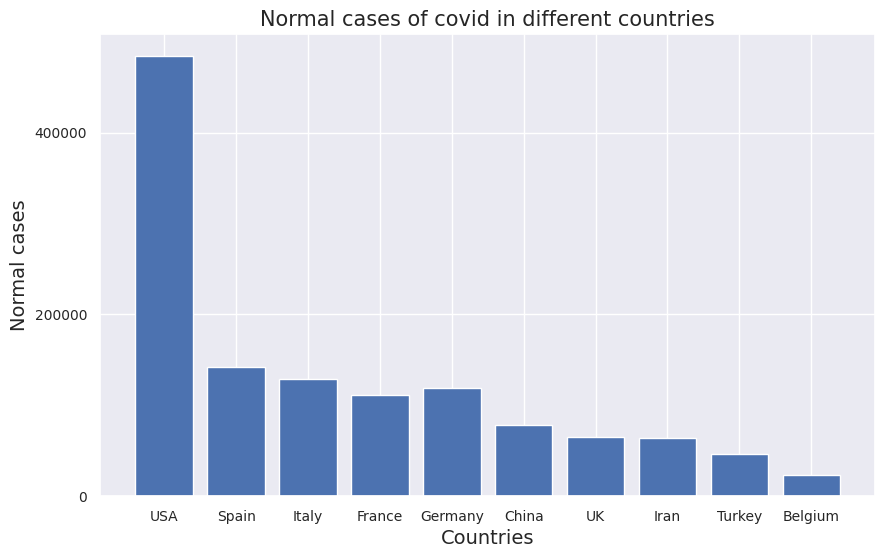

In [88]:
plt.figure(figsize= (10,6))
plt.bar(x,y)
plt.title('Normal cases of covid in different countries', fontsize=15)
plt.xlabel('Countries', fontsize = 14)
plt.xticks(fontsize=10)
plt.ylabel('Normal cases', fontsize=14)
plt.yticks(fontsize=10)
plt.show()

# **Sub Plots :**
A subplot in Matplotlib is a way to place multiple plots (charts) in a single figure. Instead of creating separate figures subplots let us organize plots in rows and columns within the same window.

# **Code** Logic :-
In this graph we see two bar charts side by side

The left chart shows how many matches each of the first 10 teams won.

The right chart shows how much experience the employees have on a scale.

The x-axis lists the experience tier rotated for readability and the y-axis shows the payment salary tier . This lets us compare salary vs experience for each employee visually.

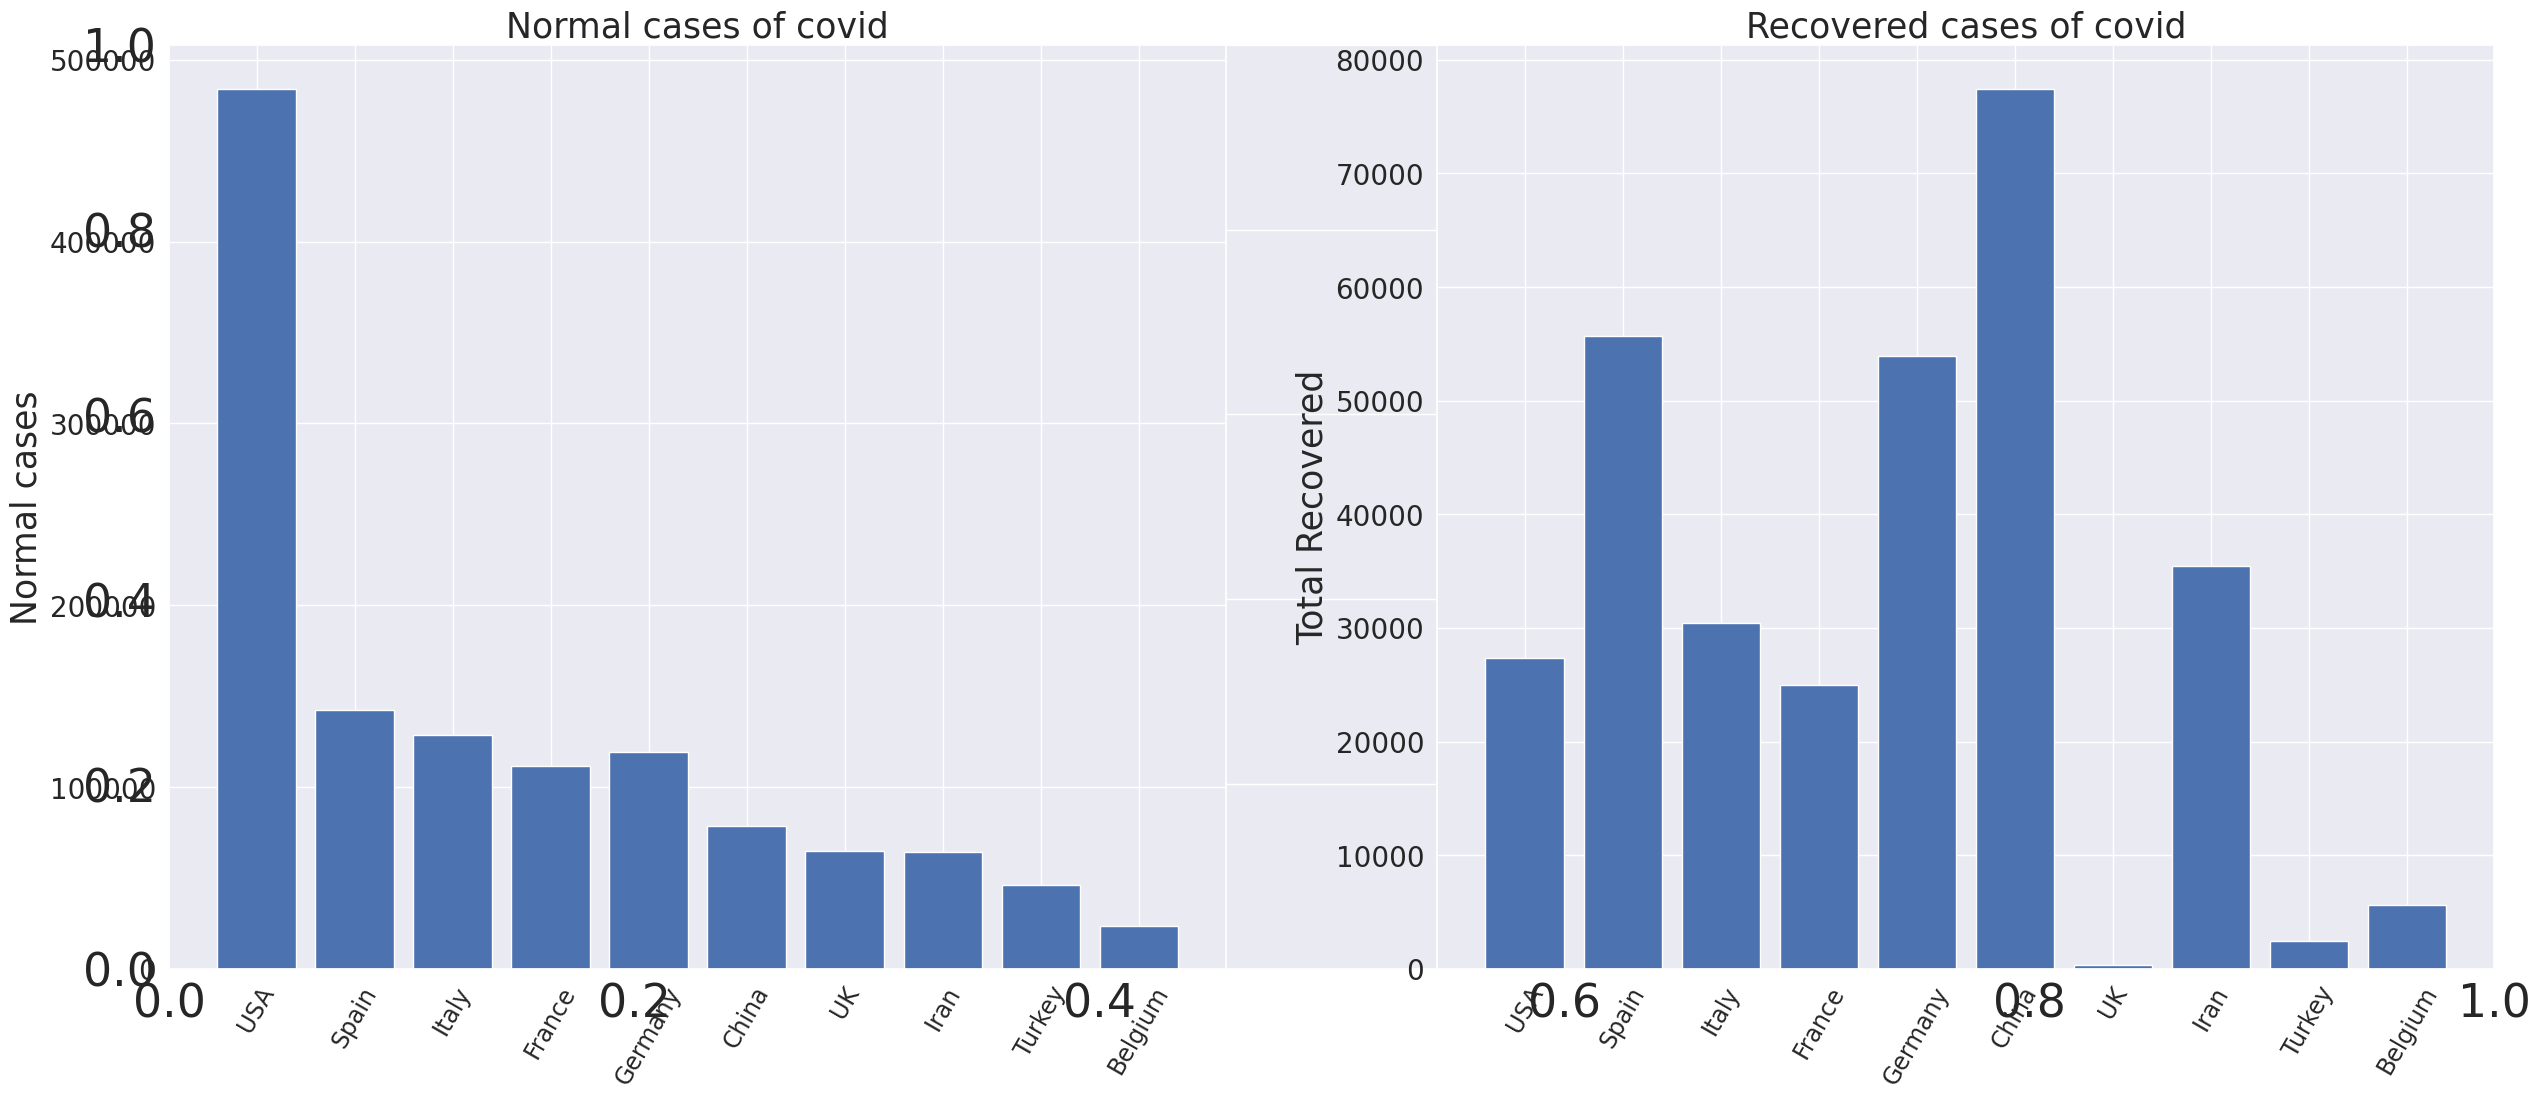

In [89]:
fig, ax = plt.subplots(figsize=(30,12))

x = cd1['Country'][0:10]
y = cd1['Normal_cases'][0:10]
y1 = cd1['Total_Recovered'][0:10]

plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(rotation=60,fontsize = 17)
plt.ylabel('Normal cases', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Normal cases of covid', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(rotation=60,fontsize = 17)
plt.ylabel('Total Recovered', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Recovered cases of covid', fontsize=25)
plt.show()

# **Plotting a bar chart using Seaborn :**
A bar chart is used to compare categorical data.

In Seaborn, we use sns.barplot() to create it.

# **Code Logic :-**
This code creates a bar chart using Seaborn to show the number of deaths in different countries based on given covid dataset.

/tmp/ipython-input-1335529826.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



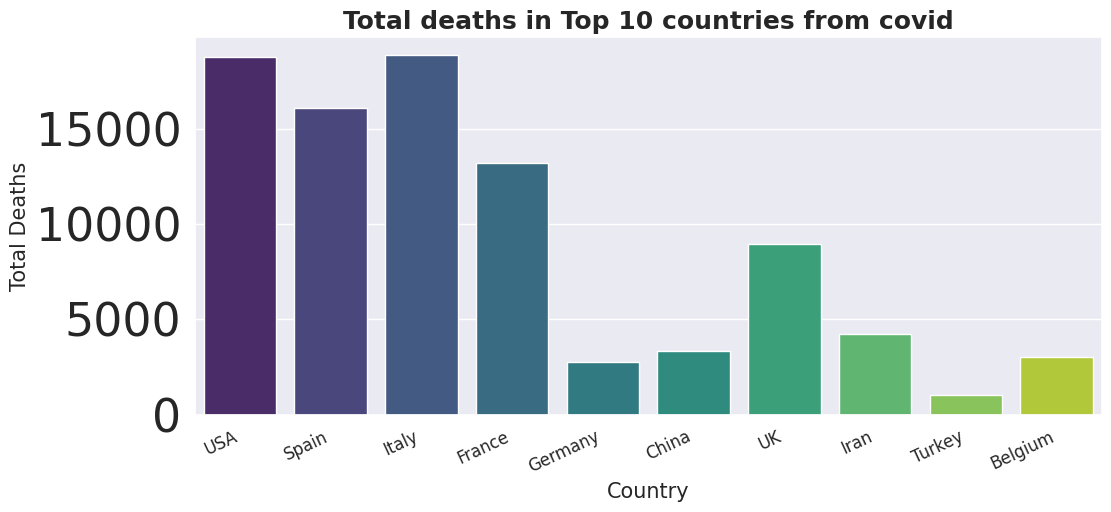

In [90]:
plt.figure(figsize=(12,6))
data = cd1.head(10)

sns.barplot(data=data, x='Country', y='Total_Deaths', palette='viridis')

plt.title('Total deaths in Top 10 countries from covid', fontsize=18, fontweight='bold')
plt.xlabel('Country', fontsize=15)
plt.ylabel('Total Deaths', fontsize=15)

plt.xticks(rotation=25, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

# **Sub Bar Plot Using Seaborn :**
A subplot in Matplotlib is a way to place multiple plots (charts) in a single figure. Instead of creating separate figures subplots let us organize plots in rows and columns within the same window.

In Seaborn, you we use sns.barplot() to create it.

But in subploting we aslo give them names to both "left" and "right" charts for creating subplot just like below i use (ax1) for left one chart and(ax2) for the right one chart.

# **Code Logic :-**
This code creates two Seaborn bar charts side by side in one figure for the first 10 rows of fd1:

Left chart (ax1) shows Total cases from covid in top countries.

Right chart (ax2) shows total deaths from covid in top countries.


Inshort, this allows easy comparison of people died vs people infected from covid in different countries during covid.

/tmp/ipython-input-55562421.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/tmp/ipython-input-55562421.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



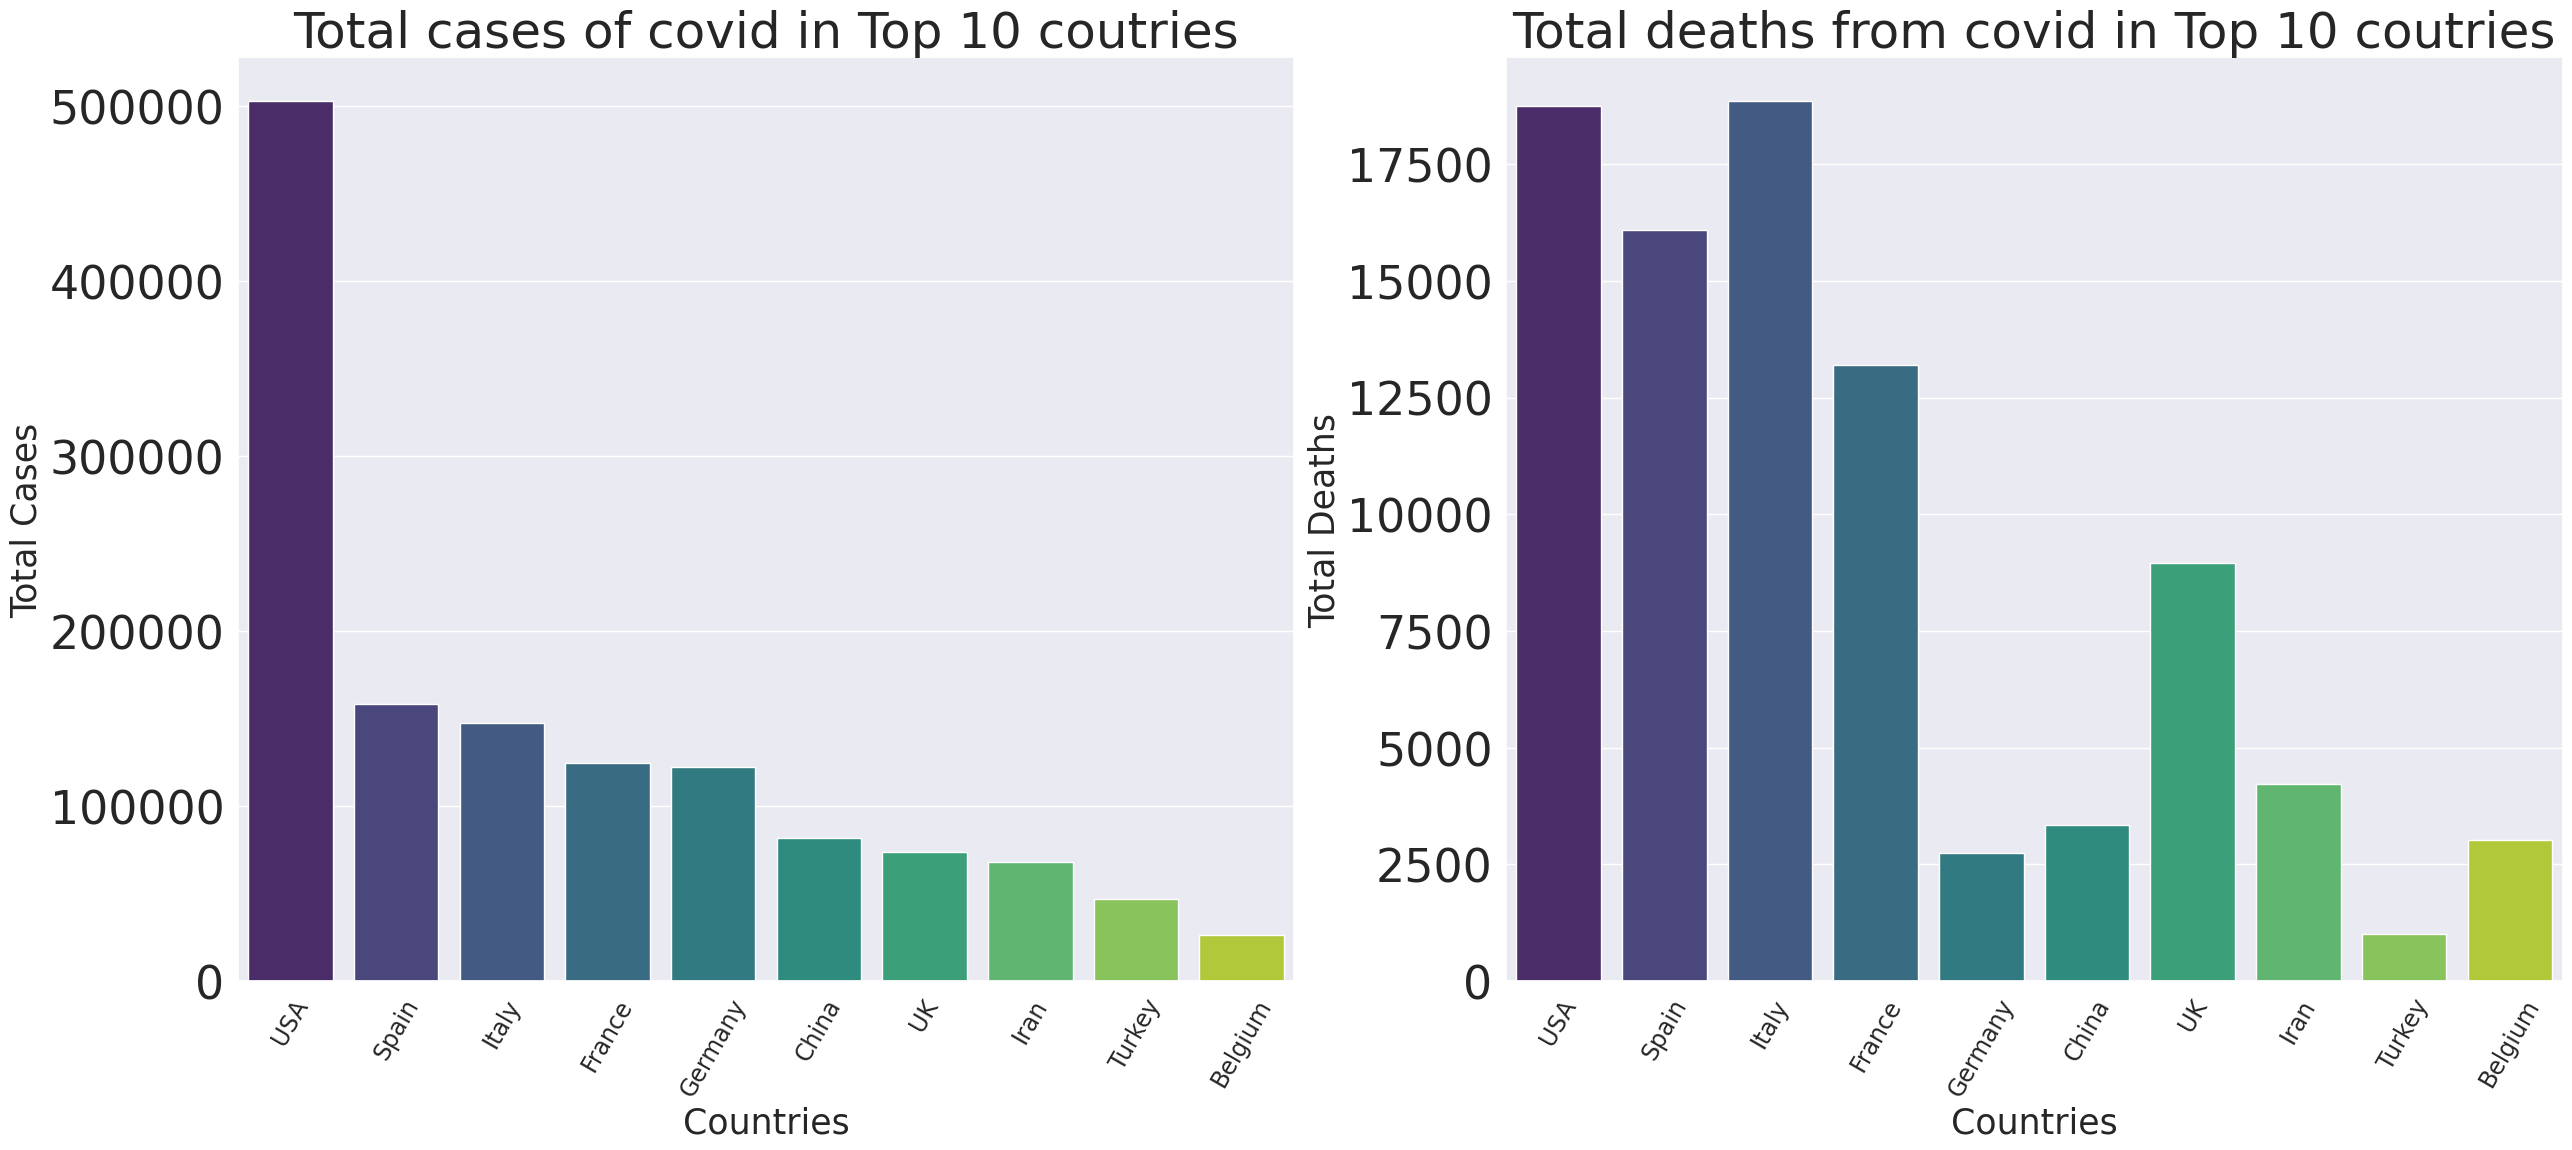

In [91]:
fig, ax = plt.subplots(1, 2,figsize=(30,12))

data = cd1[0:10]

sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Country',y = 'Total_Cases',palette='viridis', ax = ax[0])
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(data['Country'], rotation=60,fontsize = 17)
ax1.set_xlabel('Countries',fontsize=25)
ax1.set_ylabel('Total Cases',fontsize=25)
ax1.set_title('Total cases of covid in Top 10 coutries')


ax2 = sns.barplot(data= data, x= 'Country',y = 'Total_Deaths',palette='viridis', ax=ax[1])
plt.xticks(rotation=60,fontsize = 17)
ax2.set_xlabel('Countries',fontsize=25)
ax2.set_ylabel('Total Deaths',fontsize=25)
ax2.set_title('Total deaths from covid in Top 10 coutries')

plt.show()

# **GG** Plot :
In Python, plotnine is a library that brings ggplot-like syntax to Python.

GGplot is a popular data visualization system originally from R, based on the “Grammar of Graphics”. It provides a structured way to create complex and elegant plots by combining layers of data, aesthetics, and geometric objects.

# Key **points**:

Data – the dataset you want to plot.

Aesthetics (aes) – defines what goes on the axes, color, size, etc.

Geoms (geom_) – the type of plot, like geom_bar() for bar charts or geom_line() for line charts.

Facets – for creating subplots based on a variable.

Themes & labels – customize titles, axes, and overall appearance.

# **Plotting a bar chart using GGPLOT :**
I created a bar chart using GGplot that is given below :

# **Code Logic :-**
This code creates a bar chart using Python’s ggplot-style (plotnine) for the top 10 countries total recovered people in cd1.
It sets the x-axis to the recovered people and the y-axis with coutries.

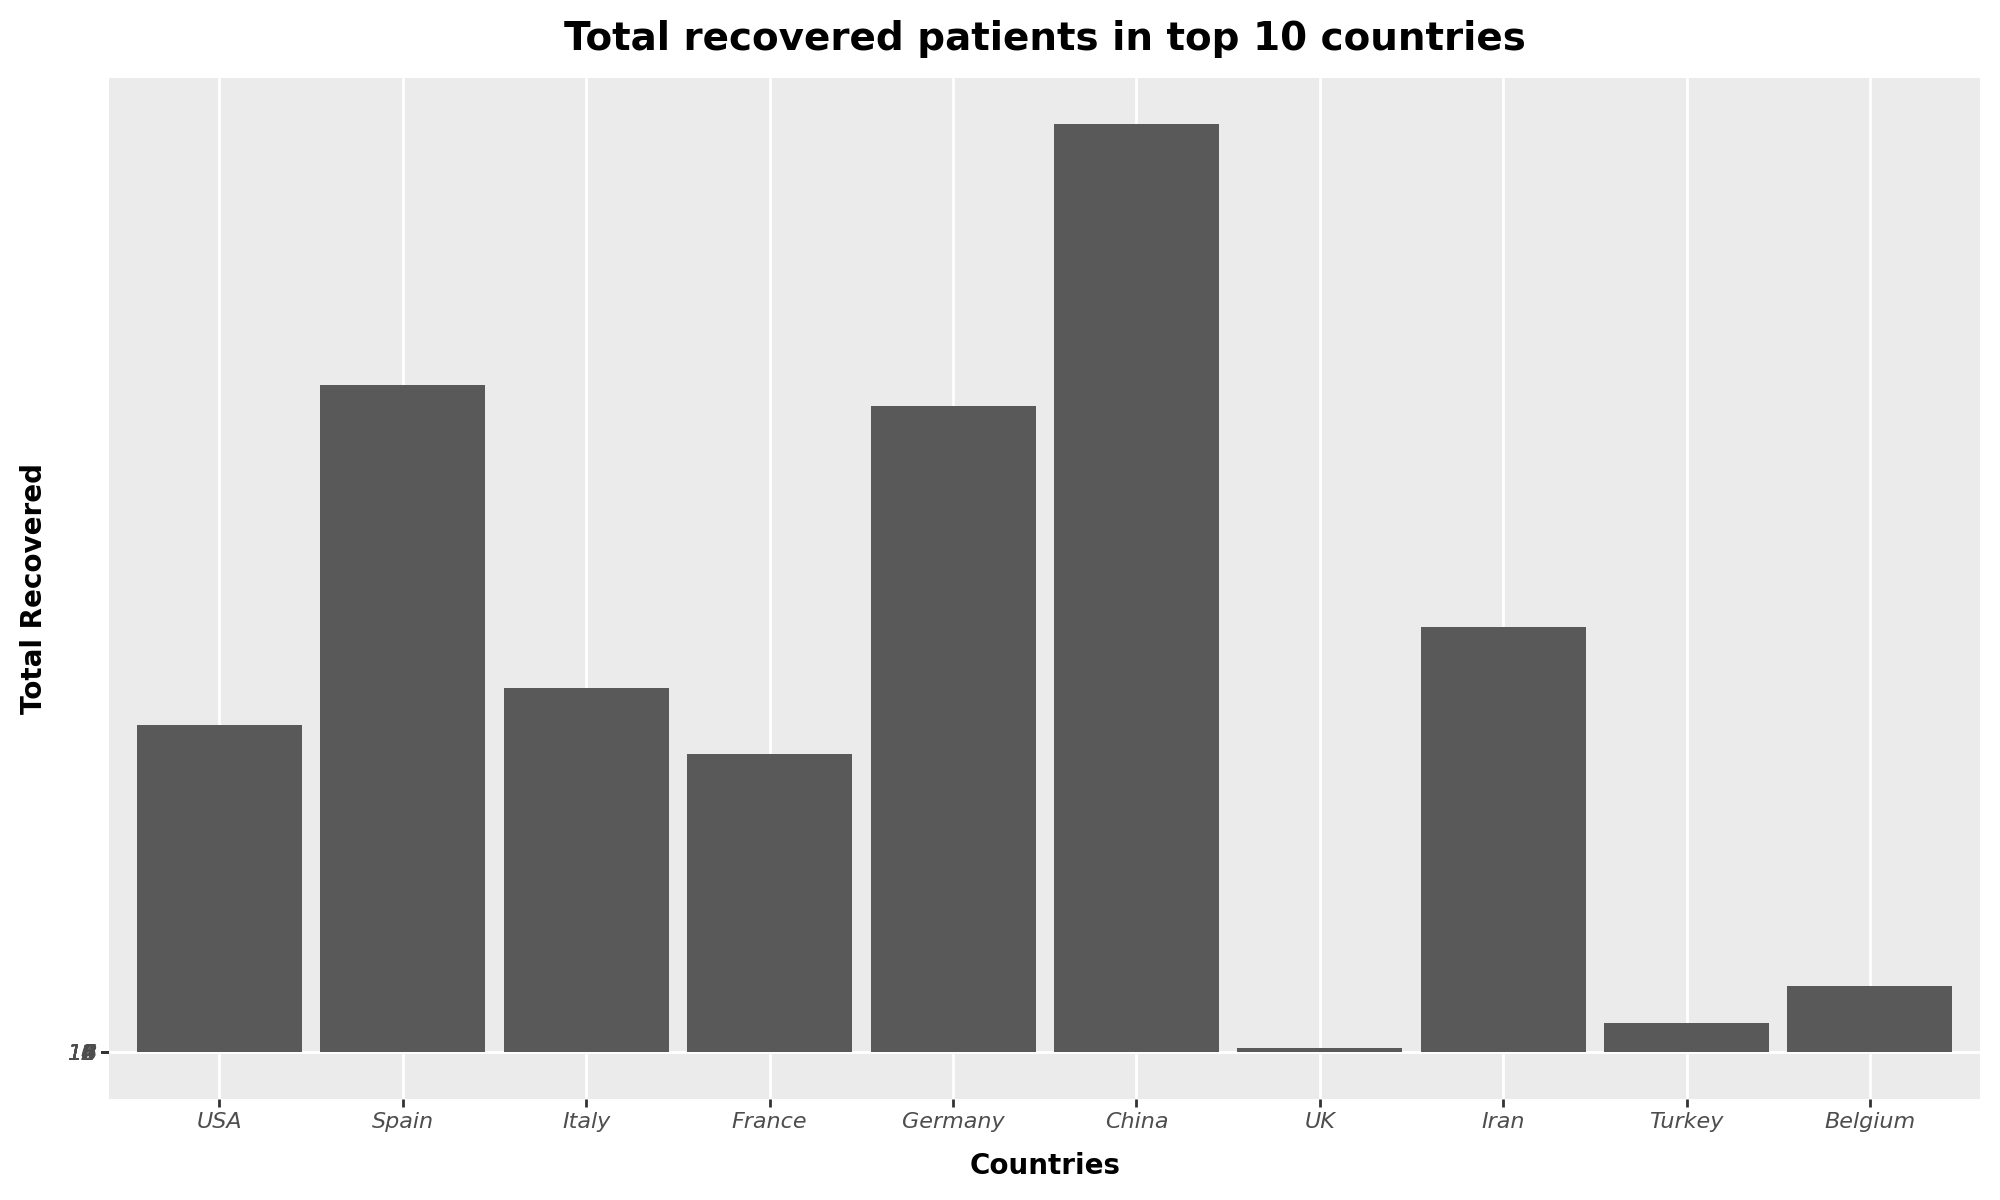

In [92]:
chart_data = cd1[0:10]
ggplot(chart_data,aes(x='Country',y = 'Total_Recovered')) + geom_col(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Country'].tolist()) \
+ scale_y_continuous(breaks=range(0, 20, 2)) \
+ labs(y='Total Recovered', x='Countries', title='Total recovered patients in top 10 countries') \
+ theme(figure_size=(10, 6),
        axis_title=element_text(face='bold',size =10),
          axis_text=element_text(face='italic',size =8),
          plot_title=element_text(face='bold',
                                  size=14))


# **Cross-Tabulation Table :**
A cross-tabulation table (or crosstab) is a way to summarize the relationship between two categorical variables in a table format.

# **CODE Logic :-**
In this table we can see how many Total_Recovered are againt each country.


In [93]:
pd.crosstab(cd1['Country'], cd1['Total_Recovered'])


Total_Recovered,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,11.0,...,6064.0,7117.0,11100.0,24932.0,27314.0,30455.0,35465.0,53913.0,55668.0,77455.0
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vatican City,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Correlation Heatmap of COVID-19 Metrics in Top 10 Countries (by Total Cases) :**
Using Correlation Heat Map in my data set it help us to know that how many Total caSES Have conceded, using colors instead of numbers. Rows represent different matrices, columns represent different matrices aswell, and the color intensity shows the frequency. This makes it easy to spot all the cases easily.
# **Code Logic :-**
This code makes a heatmap 'Total_Cases', 'Active_Cases', 'Total_Deaths', 'Total_Recovered', 'Deaths', 'Normal_cases Against Total_Cases .

The numbers are shown inside each cell indicate frequency which making it easy to compare.

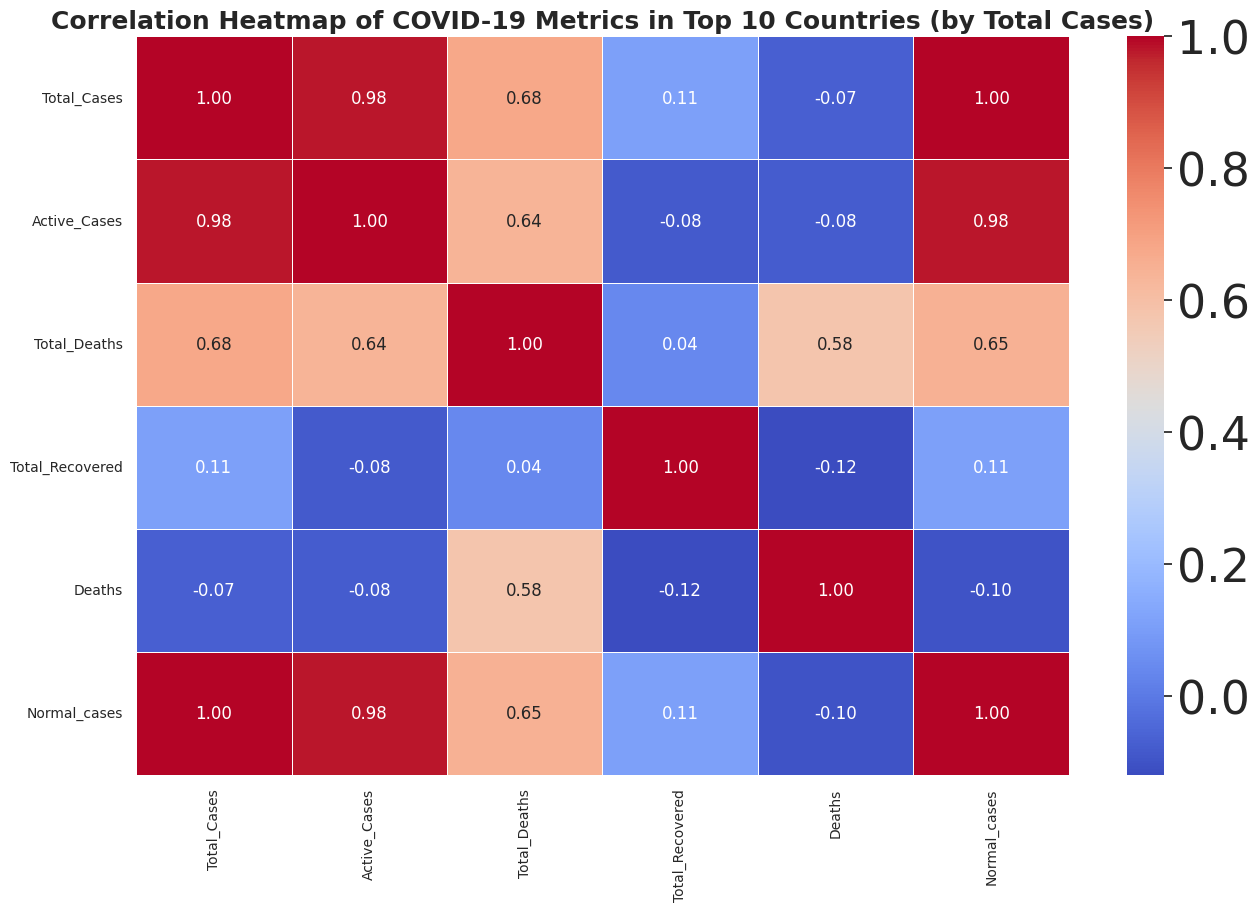

In [94]:
plt.figure(figsize=(14, 10))

top_10_countries_data = cd1.nlargest(10, 'Total_Cases')[['Total_Cases', 'Active_Cases', 'Total_Deaths', 'Total_Recovered', 'Deaths', 'Normal_cases']]
corr_matrix = top_10_countries_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 12})

plt.title('Correlation Heatmap of COVID-19 Metrics in Top 10 Countries (by Total Cases)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [95]:
S

NameError: name 'S' is not defined